In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
# sudo apt-get install texlive-latex-base texlive-fonts-recommended texlive-fonts-extra texlive-latex-extra
fontsize=25


In [2]:
def replace_graph_names(df):
    df["Input Graph"] = df["Input Graph"].str.replace("com-", "", regex=True)\
                                    .str.replace(".gbbs.txt", "", regex=True)\
                                    .str.replace(".bin", "", regex=True)\
                                    .str.replace(".ungraph.txt", "", regex=True)\
                                    .str.replace(".graph.txt", "", regex=True)

def set_face_grid_ax_ticks(g):
    """Set fontsize for x and y axis ticks for all axes in a FacetGrid."""
    for ax in g.axes.flat:
        set_ax_ticks(ax)


def set_ax_ticks(ax):
    for l in ax.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    for l in ax.xaxis.get_ticklabels():
        l.set_fontsize(fontsize)
        
def common_ax_style(ax):
    ax.set_xticks([1, 4, 8, 16, 30, 60])
    ax.set_xticklabels([1, 4, 8, 16, 30, "30h"])
    
    ax.set_yscale('log')
    # plt.yticks([0.03, 0.1, 0.3, 1])
    # ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    set_ax_ticks(ax)
        
    ax.set_xlabel("Threads", fontsize = fontsize)

def plot_data(df, ax):
    sns.lineplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", linewidth = 3, ax = ax)
    sns.scatterplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", s = 30, ax = ax, legend=False)


## plot scalability

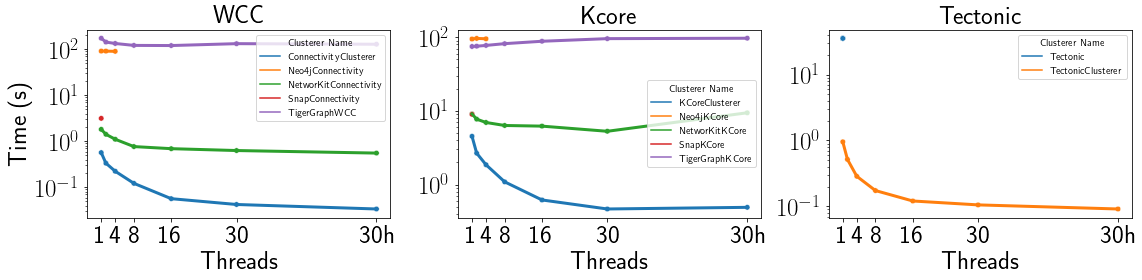

In [158]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_all.csv")
df = df[df["Round"] != 0] # remove first round
df = df.dropna(how='all')
df['Config'].fillna('none', inplace=True)

# df['Config'] = df['Config'].str.replace(",match_real_tectonic: false", "", regex=False)
# df = df[df["Config"] != "threshold: 10"]
# df = df[df['Input Graph'].isin([graph_name])]
# print(df.head())

# Average over rounds
df = df.groupby(['Clusterer Name', 'Input Graph', 'Threads', 'Config'])['Cluster Time'].mean().reset_index()
wcc_data = df[df["Clusterer Name"].isin(["ConnectivityClusterer", "SnapConnectivity", "NetworKitConnectivity", "TigerGraphWCC", "Neo4jConnectivity"])]
kcore_data = df[df["Clusterer Name"].isin(["KCoreClusterer", "SnapKCore", "NetworKitKCore", "TigerGraphKCore", "Neo4jKCore"])]
tectonic_data = df[df["Clusterer Name"].isin(["TectonicClusterer", "Tectonic"])]

fig, axs = plt.subplots(1, 3, constrained_layout=False, figsize =(16,4))#, gridspec_kw=gs_kw)
ax = axs[0]
plot_data(wcc_data, ax)
common_ax_style(ax)
ax.set_title("WCC", fontsize=fontsize)
ax.set_ylabel("Time (s)", fontsize = fontsize)

ax = axs[1]
plot_data(kcore_data, ax)
common_ax_style(ax)
ax.set_title("Kcore", fontsize=fontsize)
ax.set_ylabel("")

ax = axs[2]
plot_data(tectonic_data, ax)
common_ax_style(ax)
ax.set_title("Tectonic", fontsize=fontsize)
ax.set_ylabel("")

plt.tight_layout()
plt.savefig("../results/runtime.pdf")

In [356]:
df_slpa["Clusterer Name"].unique()

array(['Neo4jSLPA', 'SLPAClusterer'], dtype=object)

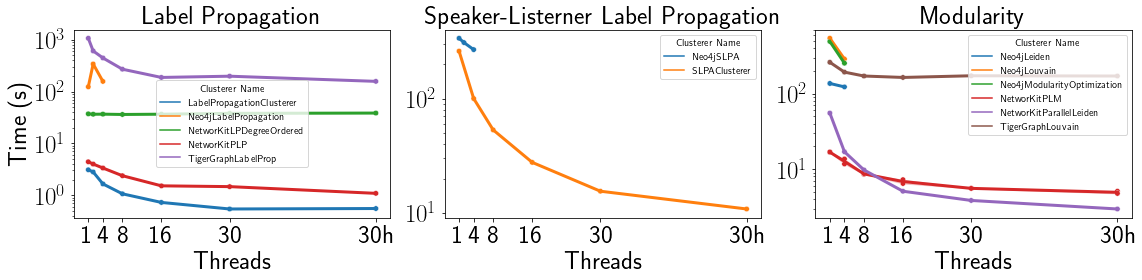

In [351]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_label.csv")
df = df[~df["Clusterer Name"].isin(["SLPAClusterer"])] # SPLAClusterer is using wrong config
df2 = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_all.csv")
df = pd.concat([df, df2])
df = df[df["Round"] != 0] # remove first round
df = df.dropna(how='all')
df['Config'].fillna('none', inplace=True)
fontsize=25
# Average over rounds
df = df.groupby(['Clusterer Name', 'Input Graph', 'Threads', 'Config'])['Cluster Time'].mean().reset_index()

df_lp = df[df["Clusterer Name"].isin(['LabelPropagationClusterer', 'Neo4jLabelPropagation',
                               'NetworKitLPDegreeOrdered', 'NetworKitPLP', 'TigerGraphLabelProp'])]
df_slpa =  df[df["Clusterer Name"].isin(["Neo4jSLPA", "SLPAClusterer", "TigerGraphSLLabelProp"])]
df_modularity = df[df["Clusterer Name"].isin(['Neo4jLeiden', 'Neo4jLouvain', 'Neo4jModularityOptimization', 
                                              'NetworKitPLM', 'NetworKitParallelLeiden', 'TigerGraphLouvain'])]

fig, axs = plt.subplots(1, 3, constrained_layout=False, figsize =(16,4))#, gridspec_kw=gs_kw)
ax = axs[0]
plot_data(df_lp, ax)
common_ax_style(ax)
ax.set_title("Label Propagation", fontsize=fontsize)
ax.set_ylabel("Time (s)", fontsize = fontsize)

ax = axs[1]
plot_data(df_slpa, ax)
common_ax_style(ax)
ax.set_title("Speaker-Listerner Label Propagation", fontsize=fontsize)
ax.set_ylabel("")

ax = axs[2]
plot_data(df_modularity, ax)
common_ax_style(ax)
ax.set_title("Modularity", fontsize=fontsize)
ax.set_ylabel("")



plt.tight_layout()
plt.savefig("../results/runtime_lp.pdf")

## Runtime Compare

In [17]:
fontsize=25

In [16]:
def plot_runtime_compare(df, base, filename):
    replace_graph_names(df)

    df_avg = df.groupby(['Clusterer Name', 'Input Graph'])['Cluster Time'].mean().reset_index()

    ## compute "speedup", actually the slowdown
    df_base = df_avg[df_avg["Clusterer Name"]==base]
    df_base = df_base.rename(columns={'Cluster Time': 'Base Time'})
    df_base = df_base.drop(columns=["Clusterer Name"])
    df_avg = df_avg.merge(df_base, on=['Input Graph'])
    df_avg["Speedup"] =  df_avg["Cluster Time"] / df_avg["Base Time"] 

    plt.figure(figsize=(12, 4))
    ax = sns.barplot(data=df_avg, x='Input Graph', y='Speedup', hue='Clusterer Name', palette='viridis',
                    order=["amazon", "youtube", "dblp", "lj", "orkut", "friendster"])
    plt.title('Slowndown w.r.t. ' + base, fontsize=fontsize-5)
    plt.ylabel('Slowdown', fontsize=fontsize-5)
    plt.xlabel('Graph', fontsize=fontsize-5)

    plt.yscale('log')
#     plt.yticks([1, 10, 100, 1e3, 1e4])
    plt.legend(loc='upper right')
    set_ax_ticks(ax)

    plt.tight_layout()
    plt.savefig(filename)


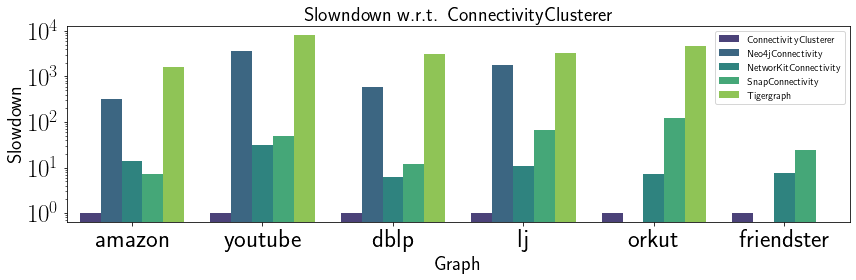

In [193]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - WCC_runtime_compare.csv")
plot_runtime_compare(df, "ConnectivityClusterer" ,"../results/out_wcc_slowdown.pdf")

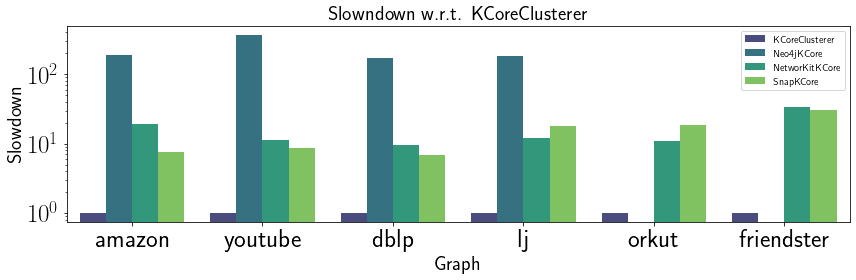

In [207]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - KCore_runtime_compare.csv")
plot_runtime_compare(df, "KCoreClusterer" ,"../results/out_kcore_slowdown.pdf")

/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_14709/4229383703.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")


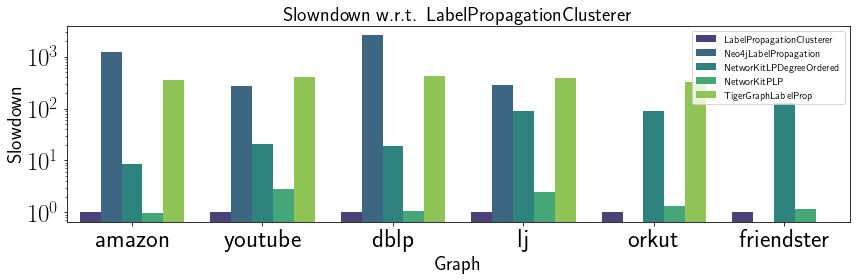

In [195]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - LP_runtime_compare.csv")
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
df_nk_neo4j = df[df['Config'].str.contains(r'maxIterations: 20(?:,|$)', na=False)]
df_us = df[df['Config'].str.contains(r'max_iteration: 20(?:,|$)', na=False)]
df_tg = df[df['Config'].str.contains(r'maximum_iteration: 20(?:,|$)', na=False)]
df_dlp = df[df["Clusterer Name"]=="NetworKitLPDegreeOrdered"]
df = pd.concat([df_nk_neo4j, df_us, df_tg, df_dlp])

plot_runtime_compare(df, "LabelPropagationClusterer" ,"../results/out_lp_slowdown.pdf")

/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_14709/3392296988.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")


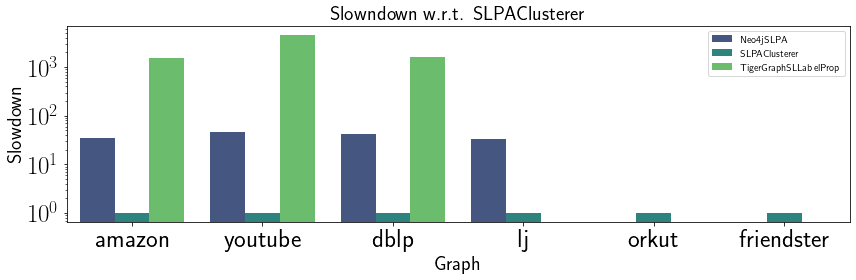

In [358]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - SLPA.csv")
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
df_neo4j = df[df['Config']=="maxIterations: 20,minAssociationStrength: 0.2"]
df_us = df[df['Config']=="max_iteration: 20,remove_nested: false,prune_threshold: 0.2"]
df_tg = df[df['Config']=="maximum_iteration: 20,threshold: 0.2"]
df = pd.concat([df_neo4j, df_us, df_tg])

plot_runtime_compare(df, "SLPAClusterer" ,"../results/out_slpa_slowdown.pdf")

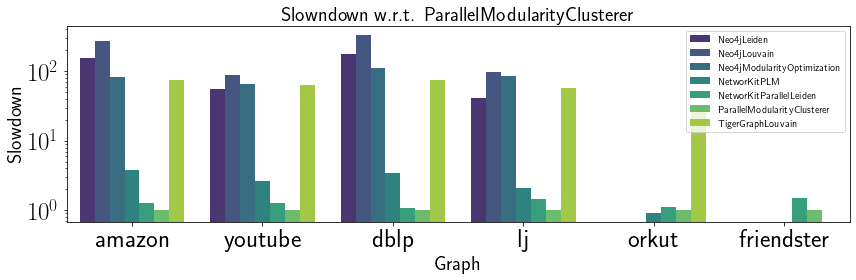

In [18]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - Modularity.csv")
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
df = df[df['Config'].isin(["gamma: 1,iterations: 10", "use_refine: False,gamma: 1,maxIter: 10,recurse: True",
                             "gamma: 1,maxLevels: 10", "maxIterations: 10,maxLevels: 10", 
                              "maxIterations: 10,minCommunitySize: 2", "maxIterations: 10"
                             ])]
df_google = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/snap_results/stats_snap_google.csv")[["Input Graph", "Clusterer Name", "Config", "Cluster Time"]]
df_google = df_google[df_google['Config'].isin([
    "resolution: 0.9201023981873934, correlation_config: {louvain_config: {num_iterations: 10, num_inner_iterations: 10},use_refinement: false,clustering_moves_method: LOUVAIN}",
                             ])]

df = pd.concat([df, df_google])
plot_runtime_compare(df, "ParallelModularityClusterer" ,"../results/out_md_slowdown.pdf")